23 65
(23, 17)
(23, 17)
(23, 17)
(23, 17, 3)


[None]

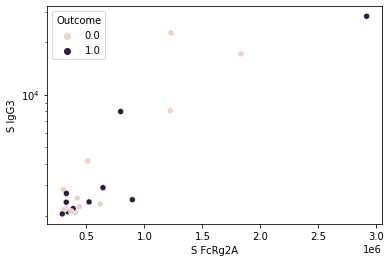

In [46]:
from sklearn.preprocessing import scale, StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import r2_score
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Cov = pd.read_csv('CovData.csv')
r, c = Cov.shape
print(r,c)

SMat = Cov.iloc[:,13:c-1:3]
RMat = Cov.iloc[:,14:c:3]
NMat = Cov.iloc[:,15:c:3]

print(np.shape(SMat))
print(np.shape(RMat))
print(np.shape(NMat))

Tensor = np.dstack((SMat, RMat, NMat))
print(np.shape(Tensor))

Plot1 = sns.scatterplot(y="S IgG3", x="S FcRg2A", data=Cov, hue="Outcome")
Plot1.set(yscale="log")

